# Composite  Cavalieri-Simpson rule

The **Composite Cavalieri-Simpson** rule is a numerical analysis method for numerical integration. It's equivalent to using the **Newton-Cotes** formula for a value of $n=2$.
The basic idea of every Newton-Cotes derived rule is that the $[a,b]$ interval must be split in multiple subdivisions.
The Cavalieri-Simpson rule requires $m$ equally spaced subdivisions, where $m$ is even. The rule can be expressed as the following:

$h = \frac{(b-a)}{m};\quad$
$x_{i} = a + ih, \quad$ where $i = 0, \dots, m$.

$S = f(a) + 4 \sum\limits_{i=1}^{m-1} f(a + ih) + 2 \sum\limits_{j=2}^{m-2} f(a + jh) + f(b), \quad$ where $i$ is odd and $j$ is even

$\int_{a}^{b}f(x)dx \approx \frac{h}{3}S$


## Python implementation

The following code has been written in a way that everage `numpy`'s **broadcasting** feature, avoiding explicit iterative cycles. It calculates an approximation of the definite integral $\int_{0}^{1}x^{\frac{11}{2}}dx$, with a tolerance of $1e-8$ and $20$ maximum iterations allowed.

In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Avoid having to manually call plt.show()
%matplotlib inline

In [2]:
# Composite Cavalieri-Simpson rule
#
# I = simpson (f,a,b,m);
#
# Input params:
# f: integrand function
# a: left extreme of the intregration interval
# b: right extreme of the intregration interval
# m: number of subintervals (even!)
#
# Output:
# I: definite integral approximation
def simpson(f, a, b, m):
    if m % 2 == 1:
        raise ValueError('m must be even.')
    
    h = (b - a) / m # Calculate the step h
    
    sum_fa_fb = f(a) + f(b) # Sum of the function evaluated in a and b
    
    # Row vector with m evenly spaced segments calculated over the interval [a, b]
    row_space = np.linspace(a, b, num=m+1)
    
    # Extract the even-indexed values from row_space.
    # The first of these values is a, and the last is b. I'll need to exclude them later on.
    even_space_with_ab = row_space[0:row_space.size:2]
    
    # Row vector with the odd-indexed values of row_space, without a or b
    odd_space = even_space_with_ab[1:-1]
    
    # Row vector with the even-indexed values of row_space, without a or b
    even_space = row_space[1:row_space.size-1:2]
    
    # vectorize given function
    f_vec = np.vectorize(f, otypes=[float])
    
    # calculate the sum of the function evaluated in every even_space point
    sum_even_space = np.sum(f_vec(even_space))
    
    # calculate the sum of the function evaluated in every odd_space point
    sum_odd_space = np.sum(f_vec(odd_space))
    
    # calculate the Simpson's S value
    S = sum_fa_fb + 4*sum_even_space + 2*sum_odd_space
    
    # calculate and return the approximated integral
    I = h * S / 3
    return I
    

In [3]:
# Adaptive Cavalieri-Simpson
#
# [int,Q,flag]=simpson_adattativa(f,a,b,m,toll,nmax)
#
# Input params:
# f: integrand function
# a: left extreme of the intregration interval
# b: right extreme of the intregration interval
# m: number of subintervals (even!)
#
# Output:
# int_row: row vector containing the I(n) approximations, for 0 <= n <= nmax
# Q: real solution with an absolute error < 1e-8
# flag: 0 the process executed correctly, else 1.
def adaptive_simpson(f, a, b, m):
    n = 0
    n_max = 20 # max number of allowed iterations
    tol = 1e-8 # absolute error tolerance
    err = tol + np.spacing(1) # np.spacing(1) is the equivalent of eps in Matlab
    Q, _ = integrate.quad(f, a, b, epsabs=tol) # exact solution with a tolerance of toll
    
    # preallocate subsequente approximations vector
    int_row = np.zeros(n_max + 1)
    
    # add the first approximation to int_row
    int_row[n] = simpson(f, a, b, m)
    
    while n <= n_max and abs(err) >= tol:
        n = n + 1 # update number of iterations
        m = 2 * m # update number of parts
        int_row[n] = simpson(f, a, b, m)
        err = int_row[n] - int_row[n-1] # update error
        
    if n == n_max:
        flag = 1 # too many iterations
    else:
        flag = 0
        int_row = int_row[:n]
    
    return int_row, Q, flag

In [4]:
def plot_error(int_row, Q):
    abs_vec = np.vectorize(abs, otypes=[float])
    
    nx = np.arange(0, int_row.size, step=1)
    ey = abs_vec(int_row - Q)
    
    # plt.grid(True)
    # plt.figure(figsize=(20,10))
    plt.xlabel("n")
    plt.ylabel("absolute error")
    plt.yscale("log")
    plt.plot(nx, ey, marker="o")
    plt.savefig("myplot.png")

In [5]:
def example():
    # initialize parameters
    f = lambda x: x**(11/2)
    a = 0
    b = 1
    m = 2
    
    int_row, Q, flag = adaptive_simpson(f, a, b, m)
    
    if flag == 0:
        plot_error(int_row, Q)
    else:
        print("No solution within tolerance")

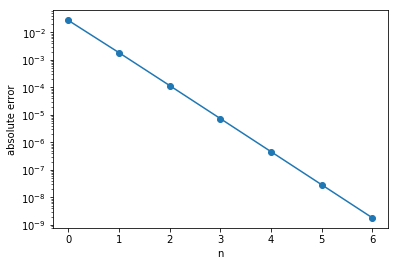

In [6]:
example()